# Install Library

Chart Studio is a library for plotting the dataset
You can still use mathplotlib, this is optional

In [1]:
!pip install chart_studio

     |████████████████████████████████| 71kB 6.5MB/s 


# Import Library
## Use Plotly is optional, Plotly chose because we can filter the data to be shown
### You can use Matplotlib as well

In [3]:
import plotly.graph_objects as go
import plotly.io as pio
import chart_studio
import plotly.express as px
chart_studio.tools.set_credentials_file(username='DerniAgeng', api_key='ZMAguW1HDlV8v7EYvqVJ')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tsmoothie.smoother import *
from tsmoothie.utils_func import create_windows
import matplotlib.dates as md

# Data Exploratory
Data Preprocessing For Maintenance Building

In [9]:
df = pd.read_csv("hotaiLog_2020_07-08.csv", encoding='latin-1')
df2 = pd.read_csv("hotaiLog_2020_0901-1025.csv", encoding='latin-1')
df3 = pd.read_csv('hotaiLog_2020_1026-1217.csv', encoding='latin-1', error_bad_lines=False)
df4 = pd.read_excel('hotaiLog_20201218-20210131.xlsx')
df5 = pd.read_excel('hotaiLog_20210201-20210315.xlsx')
df6 = pd.read_excel('hotaiLog_20210316-20210428.xlsx')
data = pd.concat([df,df2,df3,df4,df5,df6])
data.describe()

,meterType,slaveAddr,blockId,wire,freq,ua,ub,uc,uln_avg,uab,ubc,uca,ull_avg,ia,ib,ic,i_avg,pa,pb,pc,p_sum,qa,qb,qc,q_sum,sa,sb,sc,s_sum,pfa,pfb,pfc,pf_avg,aea,aeb,aec,ae_tot,rea,reb,rec,re_tot,u1_thd,u2_thd,u3_thd,uavg_thd,i1_thd,i2_thd,i3_thd,iavg_thd,tpd
count,2.721346e+06,2.721346e+06,2.721346e+06,2721346.0,2.721346e+06,791020.0,791000.0,790992.0,790999.000000,790995.000000,791045.000000,791057.000000,402026.000000,791046.000000,791051.000000,791049.000000,791050.000000,7.910520e+05,791038.0,7.909110e+05,2.721346e+06,4.017260e+05,401723.0,4.016980e+05,8.095530e+05,401650.000000,401645.0,401639.000000,8.096360e+05,4.019080e+05,401909.0,4.019270e+05,790956.000000,389020.0,389020.0,389020.0,2.721346e+06,0.0,0.0,0.0,2.416240e+06,488607.000000,401897.000000,401903.0,401915.000000,401927.000000,401934.0,401947.000000,401981.000000,85412.000000
mean,2.178861e+00,1.963350e+00,1.518149e+00,1.0,6.452273e+01,0.0,0.0,0.0,111.083871,111.581967,111.418661,110.316061,6060.274317,5.207587,1.825411,5.083003,4.969421,8.712121e+07,0.0,6.147482e+04,1.013463e+08,2.156554e+08,0.0,5.230725e+08,6.510083e+08,35199.198693,0.0,33847.847094,3.116231e+04,1.705724e+05,0.0,7.574665e+01,15.408444,0.0,0.0,0.0,3.155010e+05,NaN,NaN,NaN,4.478197e+07,1.603651,1.718447,0.0,1.717244,11.280168,0.0,7.403714,10.473974,28753.520957
std,1.252706e+00,1.208750e+00,2.226986e+00,0.0,5.435069e+01,0.0,0.0,0.0,112.925566,113.379064,113.219524,112.099977,5590.895166,15.826376,8.365916,15.710007,15.303209,4.236681e+08,0.0,9.956103e+06,4.553222e+08,6.453977e+08,0.0,9.217695e+08,9.870009e+08,80031.904405,0.0,80116.079500,1.018043e+05,5.806943e+05,0.0,1.267398e+04,26.764026,0.0,0.0,0.0,4.729309e+05,NaN,NaN,NaN,8.722777e+07,0.846525,0.780536,0.0,0.782266,14.696271,0.0,16.050158,14.217774,28017.892397
min,1.000000e+00,1.000000e+00,0.000000e+00,1.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,216.200000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.0,4.000000e-03,0.000000,0.0,0.0,0.0,0.000000e+00,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,523.000000
25%,1.000000e+00,1.000000e+00,0.000000e+00,1.0,5.996000e+01,0.0,0.0,0.0,0.000000,0.100000,0.100000,0.100000,224.200000,0.000000,0.000000,0.000000,0.053000,0.000000e+00,0.0,0.000000e+00,2.260000e+02,0.000000e+00,0.0,0.000000e+00,3.400000e+01,0.000000,0.0,0.000000,9.900000e+01,5.660000e-01,0.0,9.050000e-01,0.929000,0.0,0.0,0.0,2.503970e+04,NaN,NaN,NaN,1.628900e+03,1.500000,1.600000,0.0,1.600000,0.000000,0.0,0.000000,0.000000,3939.000000
50%,3.000000e+00,2.000000e+00,0.000000e+00,1.0,6.000000e+01,0.0,0.0,0.0,0.000000,0.100000,0.100000,0.100000,10937.700000,0.219000,0.000000,0.164000,0.280000,0.000000e+00,0.0,0.000000e+00,3.452000e+03,7.153000e+03,0.0,0.000000e+00,6.997000e+03,5485.000000,0.0,0.000000,1.228000e+03,8.780000e-01,0.0,1.000000e+00,1.000000,0.0,0.0,0.0,6.767985e+04,NaN,NaN,NaN,1.474330e+04,1.900000,1.900000,0.0,1.900000,7.400000,0.0,0.000000,7.300000,16018.000000
75%,3.000000e+00,2.000000e+00,2.000000e+00,1.0,6.003000e+01,0.0,0.0,0.0,225.900000,226.800000,226.500000,224.300000,11552.100000,2.972000,1.584000,3.006000,3.159000,2.063000e+03,0.0,0.000000e+00,2.438600e+04,6.290000e+04,0.0,1.802358e+05,2.147484e+09,25146.250000,0.0,20076.500000,1.116400e+04,1.000000e+00,0.0,1.000000e+00,1.000000,0.0,0.0,0.0,4.298924e+05,NaN,NaN,NaN,6.796300e+04,2.100000,2.100000,0.0,2.200000,16.400000,0.0,8.200000,14.200000,50104.000000
max,5.000000e+00,7.000000e+00,8.000000e+00,1.0,6.553500e+02,0.0,0.0,0.0,233.600000,234.800000,234.100000,231.700000,12126.500000,256.825000,179.872000,258.035000,277.643000,2.147484e+09,0.0,2.147484e+09,2.147484e+09,2.147484e+09,0.0,2.147484e+09,2.147484e+09,788292.000000,0.0,787502.000000,1.364019e+06,2.147484e+06,0.0,2.147484e+06,65.535000,0.0,0.0,0.0,1.941646e+06,NaN,NaN,NaN,2.147484e+08,5.700000,5.600000,0.0,5.500000,138.700000,0.0,

## Check missing percentage

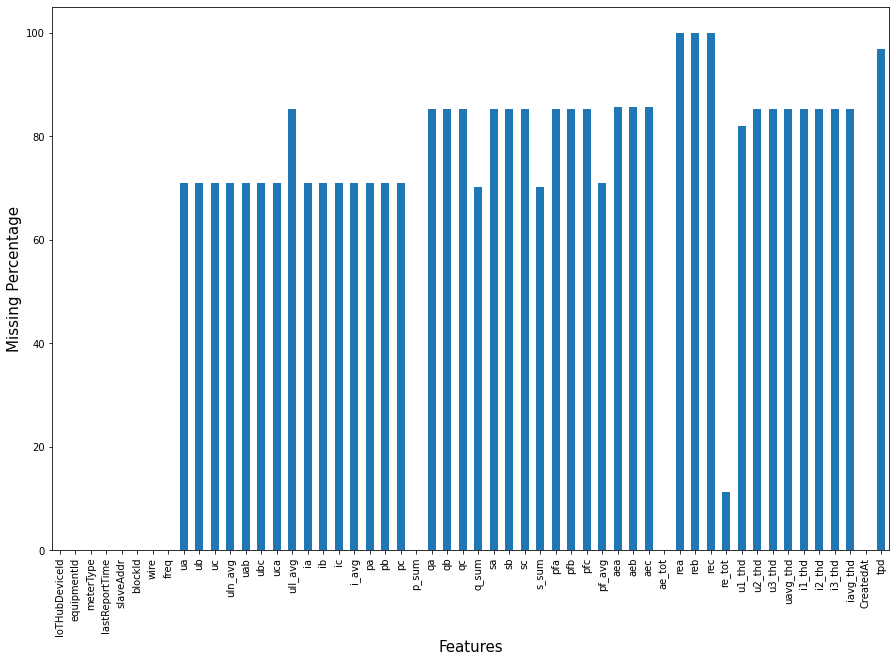

In [10]:
missing_value = data.isna().mean() * 100
missing_value.plot(kind='bar', figsize=(15,10))
plt.ylabel('Missing Percentage', size=15)
plt.xlabel('Features', size=15)
plt.show()
# data['lastReportTime'] = pd.to_datetime(data['lastReportTime'], errors = 'coerce')
# data.set_index('lastReportTime', inplace=True)
# data =  data.resample('h').mean()
# data = data.reset_index()
# data.head()

## Drop Column that has missing percentage greater than 30%

In [11]:
data = data.loc[:, data.isna().mean() < .35]
data.columns

Index(['IoTHubDeviceId', 'equipmentId', 'meterType', 'lastReportTime',
       'slaveAddr', 'blockId', 'wire', 'freq', 'p_sum', 'ae_tot', 're_tot',
       'CreatedAt'],
      dtype='object')

In [ ]:
# data = data.drop(84999) 84999 249217
data[1225310:]

,IoTHubDeviceId,equipmentId,meterType,lastReportTime,slaveAddr,blockId,wire,freq,p_sum,ae_tot,re_tot,CreatedAt
249220,001003f4e11ee2ca93000000,001003f4e11ee2ca93000001,1,2020-12-17 15:01:50,1.0,0,1.0,60.03,1.189300e+04,131581.60000000001,463.6,2020-12-17 15:02:05.477000000
249221,001003f4e11ee2ca93000000,001003f4e11ee2ca93000002,1,2020-12-17 15:01:55,2.0,0,1.0,60.06,0.000000e+00,61855.300000000003,0.0,2020-12-17 15:02:06.070000000
249222,001003304511002487000000,001003304511002487000001,1,2020-12-17 15:03:17,1.0,0,1.0,59.92,2.040000e+03,661405.90000000002,165.6,2020-12-17 15:03:34.313000000
249223,001003304511002487000000,001003304511002487000002,1,2020-12-17 15:03:18,2.0,0,1.0,59.92,2.147484e+09,207273.79999999999,1039.0,2020-12-17 15:03:34.923000000
249224,001003304511002487000000,001003304511002487000003,1,2020-12-17 15:03:18,3.0,0,1.0,59.92,1.146600e+04,421766.79999999999,214748368.0,2020-12-17 15:03:35.513000000
...,...,...,...,...,...,...,...,...,...,...,...,...
631705,0010033045110af00b000000,0010033045110af00b000001,1,2020-12-17 23:59:15,1.0,0,1.0,60.01,9.300000e+02,41847.9,214748368.0,2020-12-17 23:59:17.103000000
631706,001003f4e11ee2ca93000000,001003f4e11ee2ca93000001,1,2020-12-17 23:59:26,1.0,0,1.0,60.07,1.297400e+04,131629,590.3,2020-12-17 23:59:30.580000000
631707,001003f4e11ee2ca93000000,001003f4e11ee2ca93000002,1,2020-12-17 23:59:31,2.0,0,1.0,60.12,0.000000e+00,61865.8,0.0,2020-12-17 23:59:47.200000000
631708,001003f4e11edd022d000000,001003f4e11edd022d000001,1,2020-12-17 23:59:59,1.0,0,1.0,60.08,7.280000e+03,334629,214748368.0,2020-12-18 00:00:12.570000000


In [ ]:
data['ae_tot'] = pd.to_numeric(data['ae_tot'])

## Separate each ID to different dataframe

In [12]:
mt1 = data[data['equipmentId'].isin(['001003f4e11edd022d000001'])]
mt2 = data[data['equipmentId'].isin(['001003f4e11edd022d000002'])]
mt3 = data[data['equipmentId'].isin(['001003f4e11edd022d000003'])]
mt4 = data[data['equipmentId'].isin(['001003f4e11edd022d000004'])]
mt5 = data[data['equipmentId'].isin(['001003f4e11edd022d000005'])]
mt1.head()

,IoTHubDeviceId,equipmentId,meterType,lastReportTime,slaveAddr,blockId,wire,freq,p_sum,ae_tot,re_tot,CreatedAt
14,001003f4e11edd022d000000,001003f4e11edd022d000001,1,2020-07-01 00:04:56,1,0,1,59.92,5169.0,243884.6,214748368.0,2020-07-01 00:05:12.960000000
30,001003f4e11edd022d000000,001003f4e11edd022d000001,1,2020-07-01 00:09:59,1,0,1,59.96,5781.0,243885.5,214748368.0,2020-07-01 00:10:09.923000000
49,001003f4e11edd022d000000,001003f4e11edd022d000001,1,2020-07-01 00:15:02,1,0,1,60.04,16376.0,243886.2,214748368.0,2020-07-01 00:15:07.457000000
68,001003f4e11edd022d000000,001003f4e11edd022d000001,1,2020-07-01 00:20:05,1,0,1,60.00,9872.0,243887.1,214748368.0,2020-07-01 00:20:26.137000000
87,001003f4e11edd022d000000,001003f4e11edd022d000001,1,2020-07-01 00:25:08,1,0,1,59.98,8862.0,243888.0,214748368.0,2020-07-01 00:25:22.957000000


In [18]:
# test = mt1[mt2['blockId'].isin([0])]
# len(test)
mt5['blockId'].unique()
# mt21 = mt2[mt2['blockId'].isin(['1'])]
# mt20 = mt2[mt2['blockId'].isin(['0'])]
# mt20.head()

array([0])

## Convert 'LastReportTime' column as datetime

In [19]:
mt1['lastReportTime'] = pd.to_datetime(mt1['lastReportTime'], errors='coerce')
mt1.set_index('lastReportTime', inplace=True)
# mt1 = mt1.resample('h').mean()
mt1 = mt1.reset_index()
mt2['lastReportTime'] = pd.to_datetime(mt2['lastReportTime'], errors='coerce')
mt2.set_index('lastReportTime', inplace=True)
# mt2 = mt2.resample('h').mean()
mt2 = mt2.reset_index()
mt3['lastReportTime'] = pd.to_datetime(mt3['lastReportTime'], errors='coerce')
mt3.set_index('lastReportTime', inplace=True)
# mt3 = mt3.resample('h').mean()
mt3 = mt3.reset_index()
mt4['lastReportTime'] = pd.to_datetime(mt4['lastReportTime'], errors='coerce')
mt4.set_index('lastReportTime', inplace=True)
# mt4 = mt4.resample('h').mean()
mt4 = mt4.reset_index()
mt5['lastReportTime'] = pd.to_datetime(mt5['lastReportTime'], errors='coerce')
mt5.set_index('lastReportTime', inplace=True)
# mt5 = mt5.resample('h').mean()
mt5 = mt5.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

## Handle the Wrong Value
We observed the load data in particular time, and found that overflow value sent to the database(2^31)

Reference : [Overflow](https://microchipdeveloper.com/dsp0201:overflow-and-saturation)

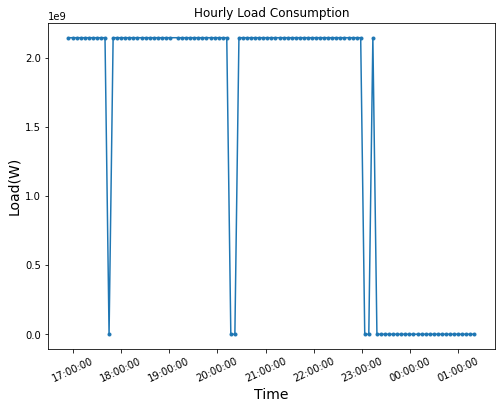

In [ ]:
plt.figure(figsize=(8,6))
xfmt = md.DateFormatter('%H:%M:%S')
plt.xticks( rotation=25 )
# plt.ylim(0,200000)
# plt.ylim(bottom=0,top=100000)
# plt.ylim(0,200000)
# plt.axis([None, None, 0, 100000])
# ylim(bottom=3)
plt.plot(mt2['lastReportTime'][200:300], mt2['p_sum'][200:300], marker='.', label='Processed Load Data')
# plt.plot(df2['lastReportTime'][30:50], changyuanbuilding['p_sum'][30:50], marker='.',linestyle='-.', label='Raw Load Data')
# plt.plot(bb, inv_yhat[:200], 'r', label="prediction")
# plt.legend(loc='upper left')
plt.title(label='Hourly Load Consumption')
plt.ylabel('Load(W)', size=14)
plt.xlabel('Time', size=14)
plt.gca().xaxis.set_major_formatter(xfmt)
# plt.label(loc = 'upper right')
# plt.title('Load - Processed Data')
plt.show()

In [ ]:
mt2[200:210]

,lastReportTime,IoTHubDeviceId,equipmentId,meterType,slaveAddr,blockId,wire,freq,p_sum,ae_tot,re_tot,CreatedAt
200,2020-07-01 16:54:46,001003f4e11edd022d000000,001003f4e11edd022d000002,1,2,0,1,60.03,2.147484e+09,605042.1,214748368.0,2020-07-01 16:55:21.380000000
201,2020-07-01 16:59:49,001003f4e11edd022d000000,001003f4e11edd022d000002,1,2,0,1,60.04,2.147484e+09,605042.3,214748368.0,2020-07-01 17:00:20.193000000
202,2020-07-01 17:04:52,001003f4e11edd022d000000,001003f4e11edd022d000002,1,2,0,1,60.03,2.147484e+09,605042.7,214748368.0,2020-07-01 17:05:29.710000000
203,2020-07-01 17:09:55,001003f4e11edd022d000000,001003f4e11edd022d000002,1,2,0,1,60.04,2.147484e+09,605043.2,214748368.0,2020-07-01 17:10:21.700000000
204,2020-07-01 17:14:58,001003f4e11edd022d000000,001003f4e11edd022d000002,1,2,0,1,60.05,2.147484e+09,605043.6,214748368.0,2020-07-01 17:14:59.200000000
205,2020-07-01 17:20:01,001003f4e11edd022d000000,001003f4e11edd022d000002,1,2,0,1,60.02,2.147484e+09,605044.0,214748368.0,2020-07-01 17:20:39.193000000
206,2020-07-01 17:25:04,001003f4e11edd022d000000,001003f4e11edd022d000002,1,2,0,1,60.00,2.147484e+09,605044.3,214748368.0,2020-07-01 17:25:14.593000000
207,2020-07-01 17:30:07,001003f4e11edd022d000000,001003f4e11edd022d000002,1,2,0,1,59.95,2.147484e+09,605044.5,214748368.0,2020-07-01 17:30:12.143000000
208,2020-07-01 17:35:10,001003f4e11edd022d000000,001003f4e11edd022d000002,1,2,0,1,59.99,2.147484e+09,605044.8,214748368.0,2020-07-01 17:36:09.743000000
209,2020-07-01 17:40:12,001003f4e11edd022d000000,001003f4e11edd022d000002,1,2,0,1,59.95,2.147484e+09,605045.0,214748368.0,2020-07-01 17:40:27.453000000


## Separate numerical column on dataset

In [20]:
vars_num_anom = [var for var in mt1.columns if data[var].dtypes != 'O']
mt2[vars_num_anom].head()

,meterType,slaveAddr,blockId,wire,freq,p_sum,ae_tot,re_tot
0,1,2,0,1,59.92,24842.0,603734.7,214748368.0
1,1,2,0,1,59.97,63817.0,603738.1,214748368.0
2,1,2,0,1,60.04,83142.0,603744.3,214748368.0
3,1,2,0,1,59.99,88017.0,603751.6,214748368.0
4,1,2,0,1,59.98,89931.0,603759.0,214748368.0


In [21]:
mt1.columns

Index(['lastReportTime', 'IoTHubDeviceId', 'equipmentId', 'meterType',
       'slaveAddr', 'blockId', 'wire', 'freq', 'p_sum', 'ae_tot', 're_tot',
       'CreatedAt'],
      dtype='object')

## Replace the wrong value with NaN

In [48]:
mt1[vars_num_anom] = mt1[vars_num_anom].replace(
    {2147483647:np.NaN})
mt2[vars_num_anom] = mt2[vars_num_anom].replace(
    {2147483647:np.NaN})
mt3[vars_num_anom] = mt3[vars_num_anom].replace(
    {2147483647:np.NaN})
mt4[vars_num_anom] = mt4[vars_num_anom].replace(
    {2147483647:np.NaN})
mt5[vars_num_anom] = mt5[vars_num_anom].replace(
    {2147483647:np.NaN})

In [27]:
mt5.isna().mean()*100

lastReportTime    0.00000
IoTHubDeviceId    0.00000
equipmentId       0.00000
meterType         0.00000
slaveAddr         0.00000
blockId           0.00000
wire              0.00000
freq              0.00000
p_sum             0.00000
ae_tot            0.00000
re_tot            0.23357
CreatedAt         0.00000
dtype: float64

# Data Imputation

We have to fill the missing values with another value to complete our dataset. There are several methods to do that. 

In this notebook we present Random Forest, Interpolation, and Average. 


We only need to select one of them

## Random Forest

In [ ]:
#MT1
# mt1withpsum = mt1[pd.isna(mt1['p_sum']) == False]
# mt1withoutpsum = mt1[pd.isna(mt1['p_sum'])]
#MT2
mt2withpsum = mt2[pd.isna(mt2['p_sum']) == False]
mt2withoutpsum = mt2[pd.isna(mt2['p_sum'])]
# #MT3
# mt3withpsum = mt3[pd.isna(mt3['p_sum']) == False]
# mt3withoutpsum = mt3[pd.isna(mt3['p_sum'])]
#MT4
# mt4withpsum = mt4[pd.isna(mt4['p_sum']) == False]
# mt4withoutpsum = mt4[pd.isna(mt4['p_sum'])]
# #MT5
# mt5withpsum = mt5[pd.isna(mt5['p_sum']) == False]
# mt5withoutpsum = mt5[pd.isna(mt5['p_sum'])]

In [ ]:
variables = ['meterType','slaveAddr', 'blockId','wire','freq','ae_tot']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# rf.fit(mt1withpsum[variables], mt1withpsum['p_sum'])
rf.fit(mt2withpsum[variables], mt2withpsum['p_sum'])
# rf.fit(mt3withpsum[variables], mt3withpsum['p_sum'])
# rf.fit(mt4withpsum[variables], mt4withpsum['p_sum'])
# rf.fit(mt5withpsum[variables], mt5withpsum['p_sum'])

# generated_psum1 = rf.predict(X = mt1withoutpsum[variables])
generated_psum2 = rf.predict(X = mt2withoutpsum[variables])
# generated_psum3 = rf.predict(X = mt3withoutpsum[variables])
# generated_psum4 = rf.predict(X = mt4withoutpsum[variables])
# generated_psum5 = rf.predict(X = mt5withoutpsum[variables])

C:\Users\Derni\AppData\Local\Continuum\anaconda3\envs\derni\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [ ]:
len(generated_psum2)

16525

In [ ]:
mt2withoutpsum['p_sum'] = generated_psum2.astype(int)

C:\Users\Derni\AppData\Local\Continuum\anaconda3\envs\derni\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [ ]:
mt2 = mt2withpsum.append(mt2withoutpsum)

## Interpolation

In [28]:
mt1= mt1.interpolate()
mt2= mt2.interpolate()
mt3= mt3.interpolate()
mt4= mt4.interpolate()
mt5= mt5.interpolate()
mt2.head()
# df1.head()

,lastReportTime,IoTHubDeviceId,equipmentId,meterType,slaveAddr,blockId,wire,freq,p_sum,ae_tot,re_tot,CreatedAt
0,2020-07-01 00:04:57,001003f4e11edd022d000000,001003f4e11edd022d000002,1,2,0,1,59.92,24842.0,603734.7,214748368.0,2020-07-01 00:05:14.110000000
1,2020-07-01 00:10:00,001003f4e11edd022d000000,001003f4e11edd022d000002,1,2,0,1,59.97,63817.0,603738.1,214748368.0,2020-07-01 00:10:10
2,2020-07-01 00:15:03,001003f4e11edd022d000000,001003f4e11edd022d000002,1,2,0,1,60.04,83142.0,603744.3,214748368.0,2020-07-01 00:15:07.553000000
3,2020-07-01 00:20:06,001003f4e11edd022d000000,001003f4e11edd022d000002,1,2,0,1,59.99,88017.0,603751.6,214748368.0,2020-07-01 00:20:26.297000000
4,2020-07-01 00:25:09,001003f4e11edd022d000000,001003f4e11edd022d000002,1,2,0,1,59.98,89931.0,603759.0,214748368.0,2020-07-01 00:25:23.100000000


## Average

In [ ]:
mt1['p_sum'] = mt1['p_sum'].fillna(mt1['p_sum'].mean())
mt2['p_sum'] = mt2['p_sum'].fillna(mt2['p_sum'].mean())
mt3['p_sum'] = mt3['p_sum'].fillna(mt3['p_sum'].mean())
mt4['p_sum'] = mt4['p_sum'].fillna(mt4['p_sum'].mean())
mt5['p_sum'] = mt5['p_sum'].fillna(mt5['p_sum'].mean())

,meterType,slaveAddr,blockId,wire,freq,p_sum,ae_tot,re_tot
count,50396.0,50396.0,50396.0,50396.0,50396.000000,50396.000000,50396.000000,0.0
mean,1.0,1.0,0.0,1.0,59.996026,22468.747321,288516.401544,NaN
std,0.0,0.0,0.0,0.0,0.047358,23404.700056,29700.200838,NaN
min,1.0,1.0,0.0,1.0,59.660000,0.000000,0.000000,NaN
25%,1.0,1.0,0.0,1.0,59.960000,5980.750000,264558.900000,NaN
50%,1.0,1.0,0.0,1.0,59.990000,10956.000000,290986.200000,NaN
75%,1.0,1.0,0.0,1.0,60.030000,32169.250000,310868.825000,NaN
max,1.0,1.0,0.0,1.0,60.250000,199271.000000,334629.000000,NaN


In [ ]:
mt5.isna().sum()

lastReportTime    0
IoTHubDeviceId    0
equipmentId       0
meterType         0
slaveAddr         0
blockId           0
wire              0
freq              0
p_sum             0
ae_tot            0
re_tot            0
CreatedAt         0
dtype: int64

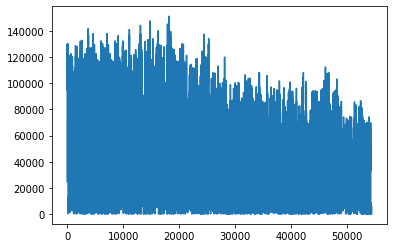

In [ ]:
mt2['p_sum'].plot()
plt.show()

# Resample each EQID in Maintenance Building

In [29]:
mt1['lastReportTime'] = pd.to_datetime(mt1['lastReportTime'], errors='coerce')
mt1.set_index('lastReportTime', inplace=True)
mt1 = mt1.resample('h').mean()
mt1 = mt1.reset_index()
mt2['lastReportTime'] = pd.to_datetime(mt2['lastReportTime'], errors='coerce')
mt2.set_index('lastReportTime', inplace=True)
mt2 = mt2.resample('h').mean()
mt2 = mt2.reset_index()
mt3['lastReportTime'] = pd.to_datetime(mt3['lastReportTime'], errors='coerce')
mt3.set_index('lastReportTime', inplace=True)
mt3 = mt3.resample('h').mean()
mt3 = mt3.reset_index()
mt4['lastReportTime'] = pd.to_datetime(mt4['lastReportTime'], errors='coerce')
mt4.set_index('lastReportTime', inplace=True)
mt4 = mt4.resample('h').mean()
mt4 = mt4.reset_index()
mt5['lastReportTime'] = pd.to_datetime(mt5['lastReportTime'], errors='coerce')
mt5.set_index('lastReportTime', inplace=True)
mt5 = mt5.resample('h').mean()
mt5 = mt5.reset_index()

In [30]:
mt1['equipmentId'] = '001003f4e11edd022d000001'
mt2['equipmentId'] = '001003f4e11edd022d000002'
mt3['equipmentId'] = '001003f4e11edd022d000003'
mt4['equipmentId'] = '001003f4e11edd022d000004'
mt5['equipmentId'] = '001003f4e11edd022d000005'

mt1.head()

,lastReportTime,meterType,slaveAddr,blockId,wire,freq,p_sum,ae_tot,re_tot,equipmentId
0,2020-07-01 00:00:00,1.0,1.0,0.0,1.0,59.974545,21797.818182,243889.818182,214748368.0,001003f4e11edd022d000001
1,2020-07-01 01:00:00,1.0,1.0,0.0,1.0,59.990833,32595.000000,243918.866667,214748368.0,001003f4e11edd022d000001
2,2020-07-01 02:00:00,1.0,1.0,0.0,1.0,60.002500,36336.333333,243952.050000,214748368.0,001003f4e11edd022d000001
3,2020-07-01 03:00:00,1.0,1.0,0.0,1.0,59.997500,43180.083333,243991.775000,214748368.0,001003f4e11edd022d000001
4,2020-07-01 04:00:00,1.0,1.0,0.0,1.0,59.992500,16648.333333,244022.700000,214748368.0,001003f4e11edd022d000001


In [31]:
mt1.to_csv('MT1(2020_07-2021_04)_interpolation.csv')
mt2.to_csv('MT2(2020_07-2021_04)_interpolation.csv')
mt3.to_csv('MT3(2020_07-2021_04)_interpolation.csv')
mt4.to_csv('MT4(2020_07-2021_04)_interpolation.csv')
mt5.to_csv('MT5(2020_07-2021_04)_interpolation.csv')

# Feature Engineering
## Create Additional Feature (Session Time, Weekend/Weekday indicator)

In [ ]:
mt1 = pd.read_csv('MT1(2020_07-2021_04)_interpolation.csv')
mt2 = pd.read_csv('MT2(2020_07-2021_04)_interpolation.csv')
mt3 = pd.read_csv('MT3(2020_07-2021_04)_interpolation.csv')
mt4 = pd.read_csv('MT4(2020_07-2021_04)_interpolation.csv')
mt5 = pd.read_csv('MT5(2020_07-2021_04)_interpolation.csv')
mt1.head()

,Unnamed: 0,lastReportTime,meterType,slaveAddr,blockId,wire,freq,p_sum,ae_tot,re_tot
0,0,2020-07-01 00:00:00,1.0,1.0,0.0,1.0,59.974545,21797.818182,243889.818182,NaN
1,1,2020-07-01 01:00:00,1.0,1.0,0.0,1.0,59.990833,32595.000000,243918.866667,NaN
2,2,2020-07-01 02:00:00,1.0,1.0,0.0,1.0,60.002500,36336.333333,243952.050000,NaN
3,3,2020-07-01 03:00:00,1.0,1.0,0.0,1.0,59.997500,43180.083333,243991.775000,NaN
4,4,2020-07-01 04:00:00,1.0,1.0,0.0,1.0,59.992500,16648.333333,244022.700000,NaN


In [32]:
mt1['lastReportTime'] = pd.to_datetime(mt1['lastReportTime'], errors='coerce')
mt1 = mt1.assign(session=pd.cut(mt1['lastReportTime'].dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))
mt2['lastReportTime'] = pd.to_datetime(mt2['lastReportTime'], errors='coerce')
mt2 = mt2.assign(session=pd.cut(mt2['lastReportTime'].dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))
mt3['lastReportTime'] = pd.to_datetime(mt3['lastReportTime'], errors='coerce')
mt3 = mt3.assign(session=pd.cut(mt3['lastReportTime'].dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))
mt4['lastReportTime'] = pd.to_datetime(mt4['lastReportTime'], errors='coerce')
mt4 = mt4.assign(session=pd.cut(mt4['lastReportTime'].dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))
mt5['lastReportTime'] = pd.to_datetime(mt5['lastReportTime'], errors='coerce')
mt5 = mt5.assign(session=pd.cut(mt5['lastReportTime'].dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))

In [33]:
mt1.head()

,lastReportTime,meterType,slaveAddr,blockId,wire,freq,p_sum,ae_tot,re_tot,equipmentId,session
0,2020-07-01 00:00:00,1.0,1.0,0.0,1.0,59.974545,21797.818182,243889.818182,214748368.0,001003f4e11edd022d000001,NaN
1,2020-07-01 01:00:00,1.0,1.0,0.0,1.0,59.990833,32595.000000,243918.866667,214748368.0,001003f4e11edd022d000001,Night
2,2020-07-01 02:00:00,1.0,1.0,0.0,1.0,60.002500,36336.333333,243952.050000,214748368.0,001003f4e11edd022d000001,Night
3,2020-07-01 03:00:00,1.0,1.0,0.0,1.0,59.997500,43180.083333,243991.775000,214748368.0,001003f4e11edd022d000001,Night
4,2020-07-01 04:00:00,1.0,1.0,0.0,1.0,59.992500,16648.333333,244022.700000,214748368.0,001003f4e11edd022d000001,Night


In [34]:
mt1['session'] = mt1['session'].cat.add_categories('Midnight')
mt1['session'] = mt1['session'].fillna('Midnight')
mt2['session'] = mt2['session'].cat.add_categories('Midnight')
mt2['session'] = mt2['session'].fillna('Midnight')
mt3['session'] = mt3['session'].cat.add_categories('Midnight')
mt3['session'] = mt3['session'].fillna('Midnight')
mt4['session'] = mt4['session'].cat.add_categories('Midnight')
mt4['session'] = mt4['session'].fillna('Midnight')
mt5['session'] = mt5['session'].cat.add_categories('Midnight')
mt5['session'] = mt5['session'].fillna('Midnight')


In [35]:
mt1['session'] = mt1['session'].replace({'Night':0,'Midnight':1,'Morning':2,'Afternoon':3,'Evening':4})
mt2['session'] = mt2['session'].replace({'Night':0,'Midnight':1,'Morning':2,'Afternoon':3,'Evening':4})
mt3['session'] = mt3['session'].replace({'Night':0,'Midnight':1,'Morning':2,'Afternoon':3,'Evening':4})
mt4['session'] = mt4['session'].replace({'Night':0,'Midnight':1,'Morning':2,'Afternoon':3,'Evening':4})
mt5['session'] = mt5['session'].replace({'Night':0,'Midnight':1,'Morning':2,'Afternoon':3,'Evening':4})

In [36]:
mt1['weekend'] = np.where((mt1['lastReportTime']).dt.dayofweek < 5,0,1)
mt2['weekend'] = np.where((mt2['lastReportTime']).dt.dayofweek < 5,0,1)
mt3['weekend'] = np.where((mt3['lastReportTime']).dt.dayofweek < 5,0,1)
mt4['weekend'] = np.where((mt4['lastReportTime']).dt.dayofweek < 5,0,1)
mt5['weekend'] = np.where((mt5['lastReportTime']).dt.dayofweek < 5,0,1)

## Merge with Temperature

In [37]:
d_two = pd.read_csv('Taipei_temperature_202007-202104.csv',sep=',',engine='python')

In [38]:
d_two['lastReportTime'] = pd.to_datetime(d_two['lastReportTime'], errors='coerce')
d_two = d_two[['Temperature', 'lastReportTime']]
# d_two['lastReportTime'] = pd.to_datetime(d_two['Date']) + pd.TimedeltaIndex(d_two['Time'], unit='H')
# d_two.head()

In [39]:
mtid1 = pd.merge(mt1, d_two, left_on='lastReportTime', right_on='lastReportTime')
mtid2 = pd.merge(mt2, d_two, left_on='lastReportTime', right_on='lastReportTime')
mtid3 = pd.merge(mt3, d_two, left_on='lastReportTime', right_on='lastReportTime')
mtid4 = pd.merge(mt4, d_two, left_on='lastReportTime', right_on='lastReportTime')
mtid5 = pd.merge(mt5, d_two, left_on='lastReportTime', right_on='lastReportTime')

In [41]:
mtid1

,lastReportTime,meterType,slaveAddr,blockId,wire,freq,p_sum,ae_tot,re_tot,equipmentId,session,weekend,Temperature
0,2020-07-01 00:00:00,1.0,1.0,0.0,1.0,59.974545,21797.818182,243889.818182,214748368.0,001003f4e11edd022d000001,1,0,27.2
1,2020-07-01 01:00:00,1.0,1.0,0.0,1.0,59.990833,32595.000000,243918.866667,214748368.0,001003f4e11edd022d000001,0,0,29.1
2,2020-07-01 02:00:00,1.0,1.0,0.0,1.0,60.002500,36336.333333,243952.050000,214748368.0,001003f4e11edd022d000001,0,0,28.9
3,2020-07-01 03:00:00,1.0,1.0,0.0,1.0,59.997500,43180.083333,243991.775000,214748368.0,001003f4e11edd022d000001,0,0,28.6
4,2020-07-01 04:00:00,1.0,1.0,0.0,1.0,59.992500,16648.333333,244022.700000,214748368.0,001003f4e11edd022d000001,0,0,28.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434,2021-04-28 19:00:00,1.0,1.0,0.0,1.0,60.024545,6114.363636,398662.772727,214748368.0,001003f4e11edd022d000001,4,0,18.4
7435,2021-04-28 20:00:00,1.0,1.0,0.0,1.0,59.995000,4522.250000,398667.341667,214748368.0,001003f4e11edd022d000001,4,0,18.4
7436,2021-04-28 21:00:00,1.0,1.0,0.0,1.0,59.985000,5365.833333,398672.008333,214748368.0,001003f4e11edd022d000001,4,0,18.3
7437,2021-04-28 22:00:00,1.0,1.0,0.0,1.0,59.980000,11969.333333,398681.791667,214748368.0,001003f4e11edd022d000001,4,0,18.4


## Combine every EQID

In [42]:
combine = pd.concat([mtid1,mtid2,mtid3,mtid4,mtid5])
combine.head()

,lastReportTime,meterType,slaveAddr,blockId,wire,freq,p_sum,ae_tot,re_tot,equipmentId,session,weekend,Temperature
0,2020-07-01 00:00:00,1.0,1.0,0.0,1.0,59.974545,21797.818182,243889.818182,214748368.0,001003f4e11edd022d000001,1,0,27.2
1,2020-07-01 01:00:00,1.0,1.0,0.0,1.0,59.990833,32595.000000,243918.866667,214748368.0,001003f4e11edd022d000001,0,0,29.1
2,2020-07-01 02:00:00,1.0,1.0,0.0,1.0,60.002500,36336.333333,243952.050000,214748368.0,001003f4e11edd022d000001,0,0,28.9
3,2020-07-01 03:00:00,1.0,1.0,0.0,1.0,59.997500,43180.083333,243991.775000,214748368.0,001003f4e11edd022d000001,0,0,28.6
4,2020-07-01 04:00:00,1.0,1.0,0.0,1.0,59.992500,16648.333333,244022.700000,214748368.0,001003f4e11edd022d000001,0,0,28.5


In [43]:
combine['lastReportTime'] = pd.to_datetime(combine['lastReportTime'], errors='coerce')
combine.set_index('lastReportTime', inplace=True)
combine = combine.resample('h').mean()
combine = combine.reset_index()
combine.head()

,lastReportTime,meterType,slaveAddr,blockId,wire,freq,p_sum,ae_tot,re_tot,session,weekend,Temperature
0,2020-07-01 00:00:00,1.0,3.0,0.0,1.0,59.976182,88042.781818,386110.503636,1.522764e+08,1,0,27.2
1,2020-07-01 01:00:00,1.0,3.0,0.0,1.0,59.989833,151474.133333,386237.018333,1.610620e+08,0,0,29.1
2,2020-07-01 02:00:00,1.0,3.0,0.0,1.0,60.004439,151392.193939,386388.277879,1.753783e+08,0,0,28.9
3,2020-07-01 03:00:00,1.0,3.0,0.0,1.0,59.998167,162370.066667,386209.940000,1.610621e+08,0,0,28.6
4,2020-07-01 04:00:00,1.0,3.0,0.0,1.0,59.991333,102104.366667,386684.130000,1.431660e+08,0,0,28.5


In [44]:
combine.to_csv('mtbuilding_cleanedwithinterpolation_202007-202104.csv')
combine.head()

,lastReportTime,meterType,slaveAddr,blockId,wire,freq,p_sum,ae_tot,re_tot,session,weekend,Temperature
0,2020-07-01 00:00:00,1.0,3.0,0.0,1.0,59.976182,88042.781818,386110.503636,1.522764e+08,1,0,27.2
1,2020-07-01 01:00:00,1.0,3.0,0.0,1.0,59.989833,151474.133333,386237.018333,1.610620e+08,0,0,29.1
2,2020-07-01 02:00:00,1.0,3.0,0.0,1.0,60.004439,151392.193939,386388.277879,1.753783e+08,0,0,28.9
3,2020-07-01 03:00:00,1.0,3.0,0.0,1.0,59.998167,162370.066667,386209.940000,1.610621e+08,0,0,28.6
4,2020-07-01 04:00:00,1.0,3.0,0.0,1.0,59.991333,102104.366667,386684.130000,1.431660e+08,0,0,28.5


# Data Analysis

## Pattern on Dataset

In [ ]:
data = pd.read_csv('mtbuilding_interpolation_07-10.csv')
data['lastReportTime'] = pd.to_datetime(data['lastReportTime'], errors='coerce')
data.set_index('lastReportTime', inplace=True)
data = data.resample('d').mean()
data = data.reset_index()

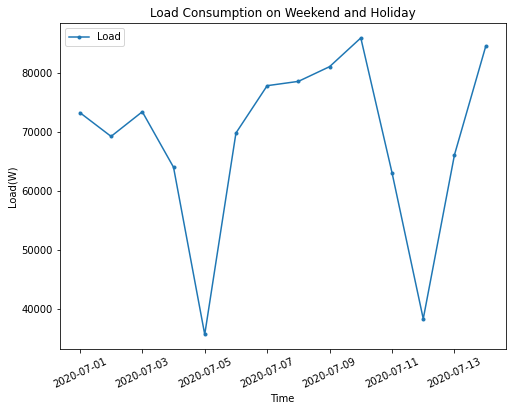

In [ ]:
xfmt = md.DateFormatter('%Y-%m-%d')
plt.figure(figsize=(8,6))
plt.xticks( rotation=25 )
# plt.ylim(0,200000)
# plt.ylim(bottom=0,top=100000)
# plt.ylim(0,200000)
# plt.axis([None, None, 0, 100000])
# ylim(bottom=3)

plt.plot(data['lastReportTime'][:14], data['p_sum'][:14], marker='.', label='Load')
plt.title(label='Load Consumption on Weekend and Holiday')
# plt.plot(df2['lastReportTime'][30:50], changyuanbuilding['p_sum'][30:50], marker='.', label='Raw Load Data')
# plt.plot(bb, inv_yhat[:200], 'r', label="prediction")
plt.legend(loc='upper left')
plt.ylabel('Load(W)')
plt.xlabel('Time')
plt.gca().xaxis.set_major_formatter(xfmt)
# plt.label(loc = 'upper right')
# plt.title('Load - Processed Data')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Load Consumption')

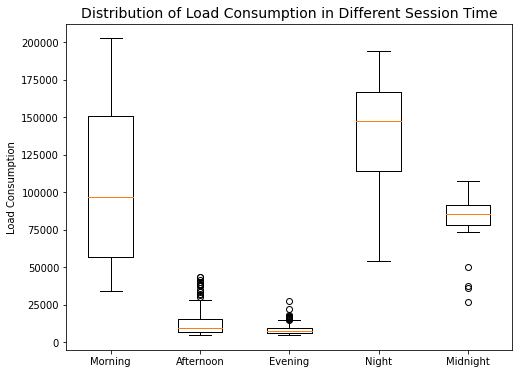

In [ ]:
data = pd.read_csv('mtbuilding_interpolation_07-10.csv')
data = data[:720]
plt.figure(figsize=(8,6))
pagi = data[data['session'].isin(['2'])]
siang = data[data['session'].isin(['3'])]
malem = data[data['session'].isin(['0'])]
midnight = data[data['session'].isin(['1'])]
sore = data[data['session'].isin(['4'])]
# bplot = [pagi['p_sum'], siang['p_sum']]
# data = [data, d2, d2[::2,0]]
# fig7, ax7 = plt.subplots()
# ax7.set_title('Multiple Samples with Different sizes')
# ax7.boxplot(pagi['p_sum'])

# pagi.head()
plt.title(label='Distribution of Load Consumption in Different Session Time', size=14)
plt.boxplot([pagi['p_sum'],siang['p_sum'],sore['p_sum'],malem['p_sum'],midnight['p_sum']], labels=['Morning','Afternoon','Evening','Night','Midnight'])
plt.ylabel(ylabel='Load Consumption')


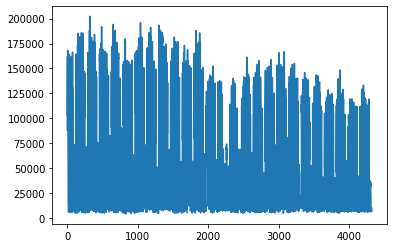

In [47]:
combine['p_sum'][:4320].plot()

In [ ]:
fig = go.Figure(go.Scatter(y=mt1['p_sum'], x =mt1['lastReportTime'], name='MT1'))
fig.add_scatter(y=mt2['p_sum'], x =mt1['lastReportTime'], name='MT2')
fig.add_scatter(y=mt3['p_sum'], x =mt1['lastReportTime'] ,name='MT3')
fig.add_scatter(y=mt4['p_sum'], x =mt1['lastReportTime'] ,name='MT4')
fig.add_scatter(y=mt5['p_sum'], x =mt1['lastReportTime'] ,name='MT5')
# fig.add_scatter(x=mt1['lastReportTime'])
fig.update_layout(title_text='Power Consumption')
pio.show(fig)